# Visualization of Italy's Eartquakes (August-November 2016)

In [ ]:
    import wget
    import os
    import zipfile
    
    import urllib3
    import certifi
    import sys
    import glob
    
    import numpy as np
    import pandas as pd
    
    import matplotlib.pyplot as plt
    
    %matplotlib inline


    import plotly.offline as py
    import plotly.graph_objs as go
    import plotly.tools as tls
    import seaborn as sns
    
    import plotly
    plotly.offline.init_notebook_mode()

In [ ]:
df = pd.read_csv("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index('Time')
df.index = pd.to_datetime(df.index)
df.head()

#### Eartquake occurences using Latitude and Longitude coordinates 

In [ ]:
latitudes = df.Latitude

longitudes = df.Longitude


# Generate scatter plot of locations of earthquakes on a 2D grid
# At each earthquake location (longitude[i], latitude[i]) put a red '+' sign

plt.scatter(longitudes, latitudes, c='r', marker='+')


# Label Axes
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earthquake Occurrences')
plt.show()

# Clear before the next set of graphs
plt.clf()

### Basemaps for Italy 

In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
earth = np.genfromtxt("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv",
                         delimiter=',', 
                         dtype=[('Latitude', np.float32), ('Longitude', np.float32)], 
                         usecols=(1, 2))

fig = plt.figure()

In [ ]:
themap = Basemap(projection='merc', 
              llcrnrlon = 6,              # lower-left corner longitude
              llcrnrlat = 36,               # lower-left corner latitude
              urcrnrlon = 19,               # upper-right corner longitude
              urcrnrlat = 49,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 0.1,
              )

In [ ]:
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gray')
themap.drawmapboundary()
themap.drawmeridians(np.arange(0, 360, 30))
themap.drawparallels(np.arange(-90, 90, 30))
x, y = themap(earth['Longitude'], earth['Latitude'])
themap.plot(x, y, 
            'o',                    # marker shape
            color='red',         # marker colour
            markersize=4,  
           
            )

plt.show()
 

In [ ]:
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')
x, y = themap(earth['Longitude'], earth['Latitude'])
themap.plot(x, y, 
            'o',                    # marker shape
            color='Indigo',         # marker colour
            markersize=4,  
           
            )

plt.show()

#### The eartquakes occurred mainly in the center of Italy 

In [ ]:
import csv

# Open the earthquake data file.
filename = 'italy_earthquakes_from_2016-08-24_to_2016-11-30.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
 
eq_map = Basemap(projection='merc', 
              llcrnrlon = 6,                # lower-left corner longitude
              llcrnrlat = 37,               # lower-left corner latitude
              urcrnrlon = 19,               # upper-right corner longitude
              urcrnrlat = 49,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 0.1,
              )
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

title_string = "Earthquakes of Magnitude 1.0 or Greater in Italy\n"
title_string += "%s through %s" % (timestrings[0], timestrings[-1])
plt.title(title_string)
plt.show()

In [ ]:
import csv

# Open the earthquake data file.
filename = 'italy_earthquakes_from_2016-08-24_to_2016-11-30.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])
        
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

def get_marker_color(magnitude):
    # Returns green for small earthquakes, yellow for moderate
    #  earthquakes, and red for significant earthquakes.
    if magnitude < 3.0:
        return ('go')
    elif magnitude < 5.0:
        return ('yo')
    else:
        return ('ro')
 
eq_map = Basemap(projection='merc', 
              llcrnrlon = 12.5,                # lower-left corner longitude
              llcrnrlat = 41.5,               # lower-left corner latitude
              urcrnrlon = 13.9,               # upper-right corner longitude
              urcrnrlat = 44.5,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 100.0,
              )
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
min_marker_size = 2.5
for lon, lat, mag in zip(lons, lats, magnitudes):
    x,y = eq_map(lon, lat)
    msize = mag * min_marker_size
    marker_string = get_marker_color(mag)
    eq_map.plot(x, y, marker_string, markersize=msize)

title_string = "Earthquakes of Magnitude 1.0 or Greater in Italy\n"
title_string += "%s through %s" % (timestrings[0], timestrings[-1])
plt.title(title_string)
plt.show()

In [1]:
%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv


from IPython.html.widgets import interact
from IPython.html import widgets
from IPython.display import display, display_pretty, Javascript, HTML
from IPython.utils.traitlets import Unicode
from mpl_toolkits.basemap import Basemap


/Users/sinapi/miniconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/sinapi/miniconda3/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [ ]:
import csv

# Open the earthquake data file.
filename = 'italy_earthquakes_from_2016-08-24_to_2016-11-30.csv'

# Create empty lists for the data we are interested in.
lats, lons = [], []
magnitudes = []
timestrings = []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        magnitudes.append(float(row[4]))
        timestrings.append(row[0])

In [ ]:
    figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
    
    def get_marker_color(magnitude):
        # Returns green for small earthquakes, yellow for moderate
        #  earthquakes, and red for significant earthquakes.
        if magnitude < 3.0:
            return ('go')
        elif magnitude < 5.0:
            return ('yo')
        else:
            return ('ro')
        
        
    # Create a new map with cylindrical projection centered around the supplie
    m = Basemap(
                ax=axes,
                projection='cyl',
                llcrnrlon = 6,                # lower-left corner longitude
                llcrnrlat = 37,               # lower-left corner latitude
                urcrnrlon = 19,               # upper-right corner longitude
                urcrnrlat = 49, 
                resolution = 'h',
              area_thresh = 0.1,
                )

    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='coral',lake_color='aqua')
    
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    m.drawstates()
    
    min_marker_size = 2.5
    for lon, lat, mag in zip(lons, lats, magnitudes):
        # Plot the geolocical events as blue dots
        
        x, y = m(lon, lat)
        msize = mag * min_marker_size
        marker_string = get_marker_color(mag)
        m.plot(x, y, marker_string, markersize=msize)
        


        #x, y = m([lon], [lat])
        #m.plot(x, y, 'rx', markersize=15.0)

    
    
    title_string = "Earthquakes of Magnitude 1.0 or Greater in Italy\n"
    title_string += "%s through %s" % (timestrings[0], timestrings[-1])
    plt.title(title_string)
    plt.show()
    
   

## Function

In [ ]:
def display_map(magnitudes):
    

    # Open the earthquake data file.
    filename = 'italy_earthquakes_from_2016-08-24_to_2016-11-30.csv'

    # Create empty lists for the data we are interested in.
    lats, lons = [], []
    magnitudes = []
    timestrings = []

    # Read through the entire file, skip the first line,
    #  and pull out just the lats and lons.
    with open(filename) as f:
        # Create a csv reader object.
        reader = csv.reader(f)

        # Ignore the header row.
        next(reader)

        # Store the latitudes and longitudes in the appropriate lists.
        for row in reader:
            lats.append(float(row[1]))
            lons.append(float(row[2]))
            magnitudes.append(float(row[4]))
            timestrings.append(row[0])
            
        figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
    
        def get_marker_color(magnitude):
            # Returns green for small earthquakes, yellow for moderate
            #  earthquakes, and red for significant earthquakes.
            if magnitude < 3.0:
                return ('go')
            elif magnitude < 5.0:
                return ('yo')
            else:
                return ('ro')


        # Create a new map with cylindrical projection centered around the supplie
        m = Basemap(
                    ax=axes,
                    projection='cyl',
                    llcrnrlon = 6,                # lower-left corner longitude
                    llcrnrlat = 37,               # lower-left corner latitude
                    urcrnrlon = 19,               # upper-right corner longitude
                    urcrnrlat = 49, 
                    resolution='i'
                    )

        m.drawmapboundary(fill_color='aqua')
        m.fillcontinents(color='coral',lake_color='aqua')

        m.drawcoastlines()
        m.drawstates()
        m.drawcountries()
        m.drawstates()

        min_marker_size = 2.5
        for lon, lat, mag in zip(lons, lats, magnitudes):
            # Plot the geolocical events as blue dots

            x, y = m(lon, lat)
            msize = mag * min_marker_size
            marker_string = get_marker_color(mag)
            m.plot(x, y, marker_string, markersize=msize)



            #x, y = m([lon], [lat])
            #m.plot(x, y, 'rx', markersize=15.0)



        title_string = "Earthquakes of Magnitude 1.0 or Greater in Italy\n"
        title_string += "%s through %s" % (timestrings[0], timestrings[-1])
        plt.title(title_string)
        plt.show()

In [ ]:
i = interact(
    display_map,
    lats=widgets.FloatSlider(description='Latitude', value=49, min=-90.0, max=90.0),
    lons=widgets.FloatSlider(description='Longitude', value=18, min=-180.0, max=180.0),
    #timestrings=(description='Start Date', value='1984-01-01'),
    #endtime=DateWidget(description='End Date', value='2014-01-01'),
    magnitudes=widgets.FloatSlider(description=" Magnitude", value=4.0, min=0.0, max=7.0)
)

## Function 

In [ ]:
def display_map(lats, lons, magnitudes):
    

    # Open the earthquake data file.
    filename = 'italy_earthquakes_from_2016-08-24_to_2016-11-30.csv'

    # Create empty lists for the data we are interested in.
    lats, lons = [], []
    magnitudes = []
    timestrings = []

    # Read through the entire file, skip the first line,
    #  and pull out just the lats and lons.
    with open(filename) as f:
        # Create a csv reader object.
        reader = csv.reader(f)

        # Ignore the header row.
        next(reader)

        # Store the latitudes and longitudes in the appropriate lists.
        for row in reader:
            lats.append(float(row[1]))
            lons.append(float(row[2]))
            magnitudes.append(float(row[4]))
            timestrings.append(row[0])
            
        figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
    

        # Create a new map with cylindrical projection centered around the supplie
        m = Basemap(
                    ax=axes,
                    projection='cyl',
                    llcrnrlon = 6,                # lower-left corner longitude
                    llcrnrlat = 37,               # lower-left corner latitude
                    urcrnrlon = 19,               # upper-right corner longitude
                    urcrnrlat = 49, 
                    resolution='i'
                    )

        m.drawmapboundary(fill_color='aqua')
        m.fillcontinents(color='coral',lake_color='aqua')

        m.drawcoastlines()
        m.drawstates()
        m.drawcountries()
        m.drawstates()
        
        for lon, lat, mag in zip(lons, lats, magnitudes):
            # Plot the geolocical events as blue dots

            x, y = m(lats, lons)
            m.plot(x, y, 'bo', alpha=0.5)


        title_string = "Earthquakes of Magnitude 1.0 or Greater in Italy\n"
        title_string += "%s through %s" % (timestrings[0], timestrings[-1])
        plt.title(title_string)
        plt.show()

In [ ]:
display_map(42.20, 13.20, 3.0)

In [ ]:
# Open the earthquake data file.
earth = np.genfromtxt("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv",
                         delimiter=',', 
                         dtype=[('Latitude', np.float32), ('Longitude', np.float32)], 
                         usecols=(1, 2))

            
figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
    

# Create a new map with cylindrical projection centered around the supplie
m = Basemap(
            ax=axes,
            projection='cyl',
            llcrnrlon = 6,                # lower-left corner longitude
            llcrnrlat = 37,               # lower-left corner latitude
            urcrnrlon = 19,               # upper-right corner longitude
            urcrnrlat = 49, 
            resolution='i'
            )
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='coral',lake_color='aqua')

m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawstates()

x, y = m(earth["Latitude"], earth["Longitude"])
m.plot(x, y, 'bo', alpha=0.5)


title_string = "Earthquakes of Magnitude 1.0 or Greater in Italy\n"
title_string += "%s through %s" % (timestrings[0], timestrings[-1])
plt.title(title_string)
plt.show()

In [5]:
df = pd.read_csv("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index('Time')
df.index = pd.to_datetime(df.index)

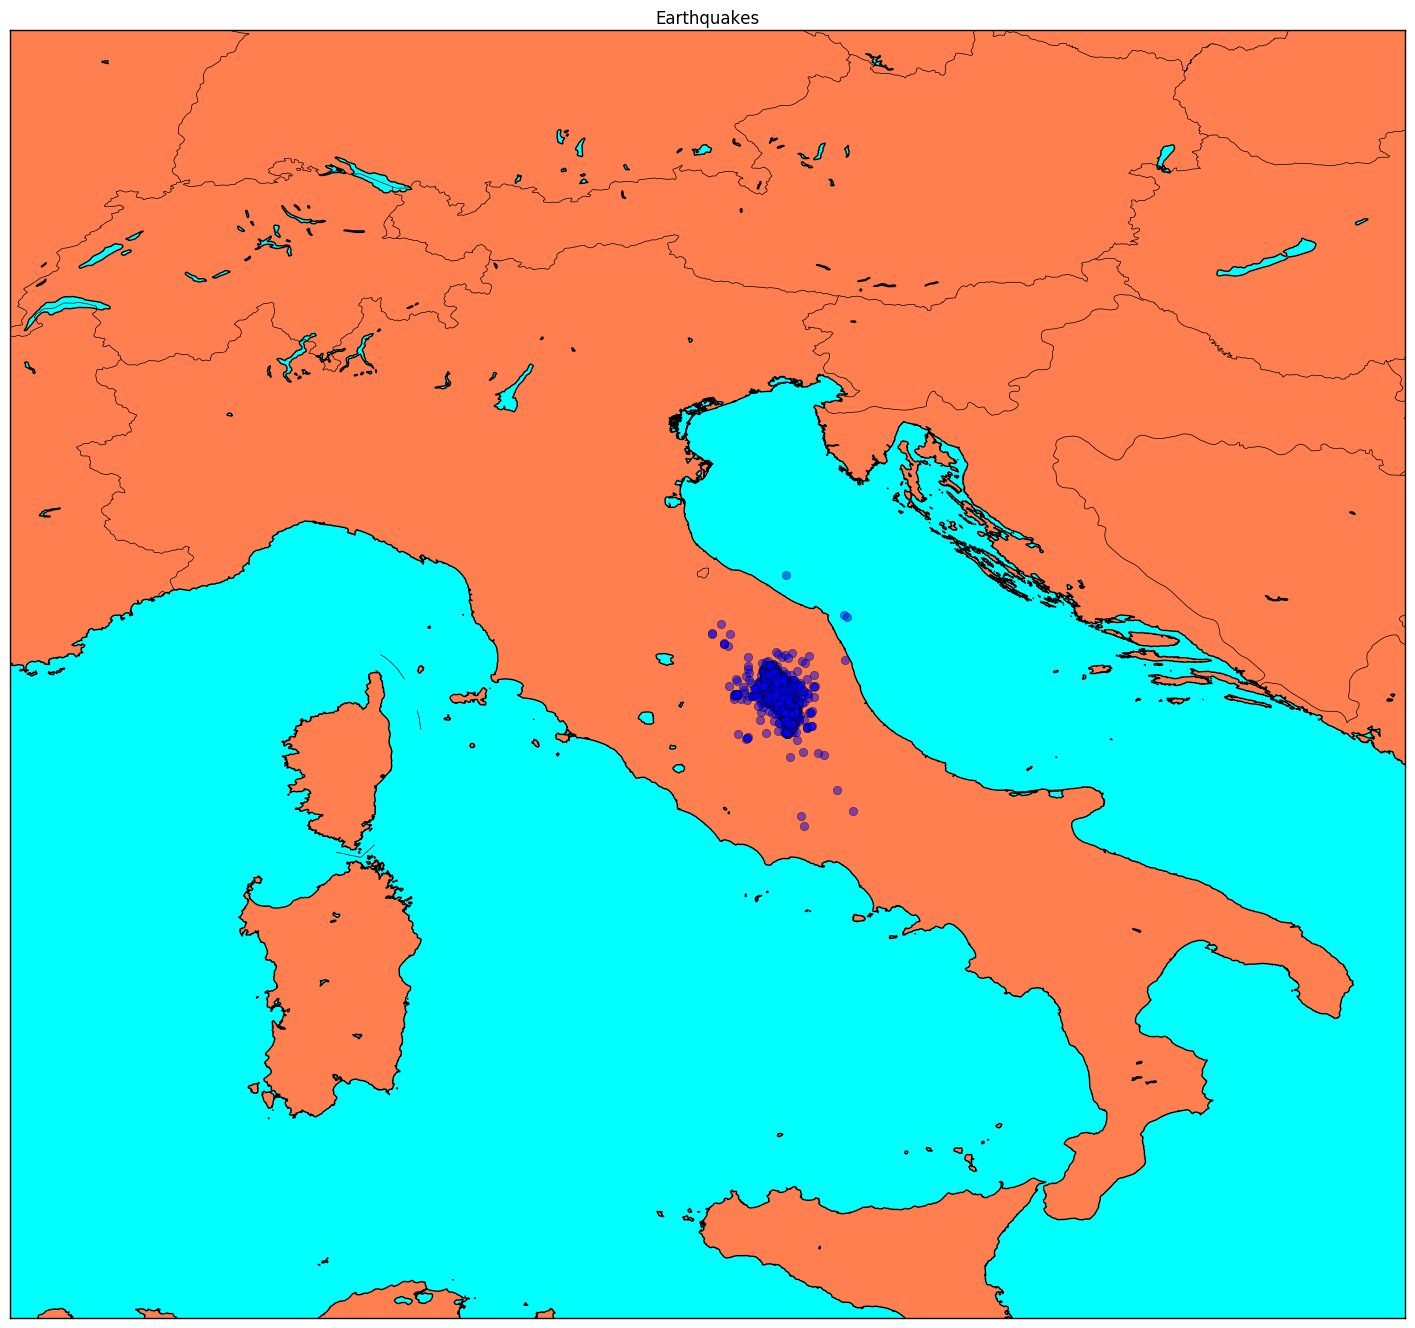

In [8]:
def display_map(Latitude, Longitude, Magnitude):
    df = pd.read_csv("italy_earthquakes_from_2016-08-24_to_2016-11-30.csv").set_index('Time')
    df.index = pd.to_datetime(df.index)
    
    figure, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))

    # Create a new map with cylindrical projection centered around the supplied
    # coordinates
    m = Basemap(
                ax=axes,
                projection='cyl',
                llcrnrlon = 6,                # lower-left corner longitude
                llcrnrlat = 37,               # lower-left corner latitude
                urcrnrlon = 19,               # upper-right corner longitude
                urcrnrlat = 49, 
                resolution = 'h',
                area_thresh = 0.1,
                )

    m.drawmapboundary(fill_color='aqua')
    m.fillcontinents(color='coral',lake_color='aqua')

    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    m.drawstates()

    # Plot the geolocical events as blue dots
    x, y = m(df.Longitude, df.Latitude)
    m.plot(x, y, 'bo', alpha=0.5)

    x, y = m([Longitude], [Latitude])
    m.plot(x, y, 'rx', markersize=15.0)

    plt.title('Earthquakes')
    plt.show()
    
    
i = interact(
    display_map,
    Latitude=widgets.FloatSlider(description='Latitude', value=19.4284700, min=-90.0, max=90.0),
    Longitude=widgets.FloatSlider(description='Longitude', value=-99.1276600, min=-180.0, max=180.0),
    Magnitude=widgets.FloatSlider(description="Magnitude", value=4.0, min=0.0, max=7.0)
)